# TM10007 Assignment template

KNN

In this part of the code a connection is made between github and this file.
All the documents from github are imported, inluding our data.
The files that are not needed for our assignment were deleted from github.

In [15]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/NFAFrijns/TM10007_G1_lipo.git

  Preparing metadata (setup.py) ... done


In [2]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/NFAFrijns/TM10007_G1_lipo.git
!pip install fast_ml --upgrade

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.4 MB/s eta 0:00:00


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [3]:
## HET SPLITSEN VAN DATA IN TRAINING EN DATA GROEP

## PRE-PROCESSING FUNCTIE VAN NICO
## PRE-PROCCESSING FUNCTIE TOEGEPAST OP DE TRAINING DATA

# Data loading functions. Uncomment the one you want to use
from worclipo.load_data import load_data
import pandas as pd
data = load_data()

# Printing the demensions of the data
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

#splitting data into X and y
y  = data['label']
X = data[data.columns[1:]]
y = pd.DataFrame(y)
X = pd.DataFrame(X)
print(f'The number of samples: {len(X.index)}')
print(f'The number of samples: {len(y.index)}')
# Counting the different labels
def ratio_lipoma_liposarcoma(y):
  lipoma = 0
  liposarcoma = 0
  for i in y['label']:
    if i == "lipoma":
      lipoma += 1
    else:
      liposarcoma += 1
  return f'Ratio van lipoma and liposarcoma is: {lipoma} : {liposarcoma}'
print(ratio_lipoma_liposarcoma(y))


The number of samples: 115
The number of columns: 494
The number of samples: 115
The number of samples: 115
Ratio van lipoma and liposarcoma is: 57 : 58


In [4]:
from sklearn.model_selection import train_test_split
# making the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

print(f'Train {ratio_lipoma_liposarcoma(y_train)}')
print(f'Test {ratio_lipoma_liposarcoma(y_test)}')

Train Ratio van lipoma and liposarcoma is: 45 : 47
Test Ratio van lipoma and liposarcoma is: 12 : 11


In [5]:
# check of there are no duplicated features and rows by using the index
if  data.index.is_unique:
  print('Features and rows are unique by name')
else:
  print('There is a duplicated features and/or rows by name')

#check of there are no dupliceted features regarding the data
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features
print(f'The number of columns: {len(X_train.columns)}')
print(f'The number of columns: {len(X_test.columns)}')

duplicate_features = get_duplicate_features(X_train)
duplicate_features.head()
duplicate_features_list = duplicate_features.query(
    "Desc=='Duplicate Values'")['feature2'].to_list()
X_train.drop(columns = duplicate_features_list, inplace=True)
X_test.drop(columns = duplicate_features_list, inplace=True)
print(f'The number of columns: {len(X_train.columns)}')
print(f'The number of columns: {len(X_test.columns)}')

Features and rows are unique by name
The number of columns: 493
The number of columns: 493
The number of columns: 467
The number of columns: 467


In [6]:
from sklearn.feature_selection import VarianceThreshold

# Record the column names and data types
original_columns_train = X_train.columns
original_dtypes_train = X_train.dtypes
# Create an instance of VarianceThreshold
selector = VarianceThreshold()

# Fit the selector to your training data
selector.fit(X_train)

# Get the indices of the features that are kept after feature selection
kept_features_indices = selector.get_support(indices=True)

# Get the names of the kept features
kept_features_names = X_train.columns[kept_features_indices]

# Transform the training data and create a new DataFrame with the kept features
relevant_features_train = selector.transform(X_train)
X_selected_train = pd.DataFrame(relevant_features_train,
                                columns=kept_features_names,
                                index=X_train.index)
# setting features back to orginale datatype
for column in X_selected_train.columns:
  if column in original_columns_train:
    X_selected_train[column] = X_selected_train[column].astype(
        original_dtypes_train[column])
# Print the original DataFrame, transformed DataFrame,
# and the number of zero-variance features
print("\nNumber of zero-variance features:", X_train.shape[1] -
      X_selected_train.shape[1])

# Test data same transformation as train
original_columns_test = X_test.columns
original_dtypes_test = X_test.dtypes
relevant_features_test = selector.transform(X_test)
X_selected_test = pd.DataFrame(relevant_features_test,
                               columns=kept_features_names, index=X_test.index)
for column in X_selected_test.columns:
  if column in original_columns_test:
    X_selected_test[column] = X_selected_test[column].astype(
        original_dtypes_test[column])


Number of zero-variance features: 7


In [7]:
X_selected_train.info()
# want to have the name of the int to check if it is a catogirsed data
integer_features = X_selected_train.select_dtypes(include='int64').columns.tolist()
print("Integer features:")
print(integer_features)

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, Lipo-032_0 to Lipo-103_0
Columns: 460 entries, PREDICT_original_sf_compactness_avg_2.5D to PREDICT_original_phasef_phasesym_entropy_WL3_N5
dtypes: float64(441), int64(19)
memory usage: 331.3+ KB
Integer features:
['PREDICT_original_hf_peak_position', 'PREDICT_original_logf_peak_position_sigma1', 'PREDICT_original_logf_peak_position_sigma5', 'PREDICT_original_logf_peak_position_sigma10', 'PREDICT_original_tf_LBP_peak_position_R3_P12', 'PREDICT_original_tf_LBP_peak_position_R15_P36', 'PREDICT_original_tf_Gabor_peak_position_F0.05_A0.0', 'PREDICT_original_tf_Gabor_peak_position_F0.05_A0.79', 'PREDICT_original_tf_Gabor_peak_position_F0.05_A1.57', 'PREDICT_original_tf_Gabor_peak_position_F0.05_A2.36', 'PREDICT_original_tf_Gabor_peak_position_F0.2_A0.0', 'PREDICT_original_tf_Gabor_peak_position_F0.2_A0.79', 'PREDICT_original_tf_Gabor_peak_position_F0.2_A1.57', 'PREDICT_original_tf_Gabor_peak_position_F0.2_A2.36', 'PREDICT_original_tf_G

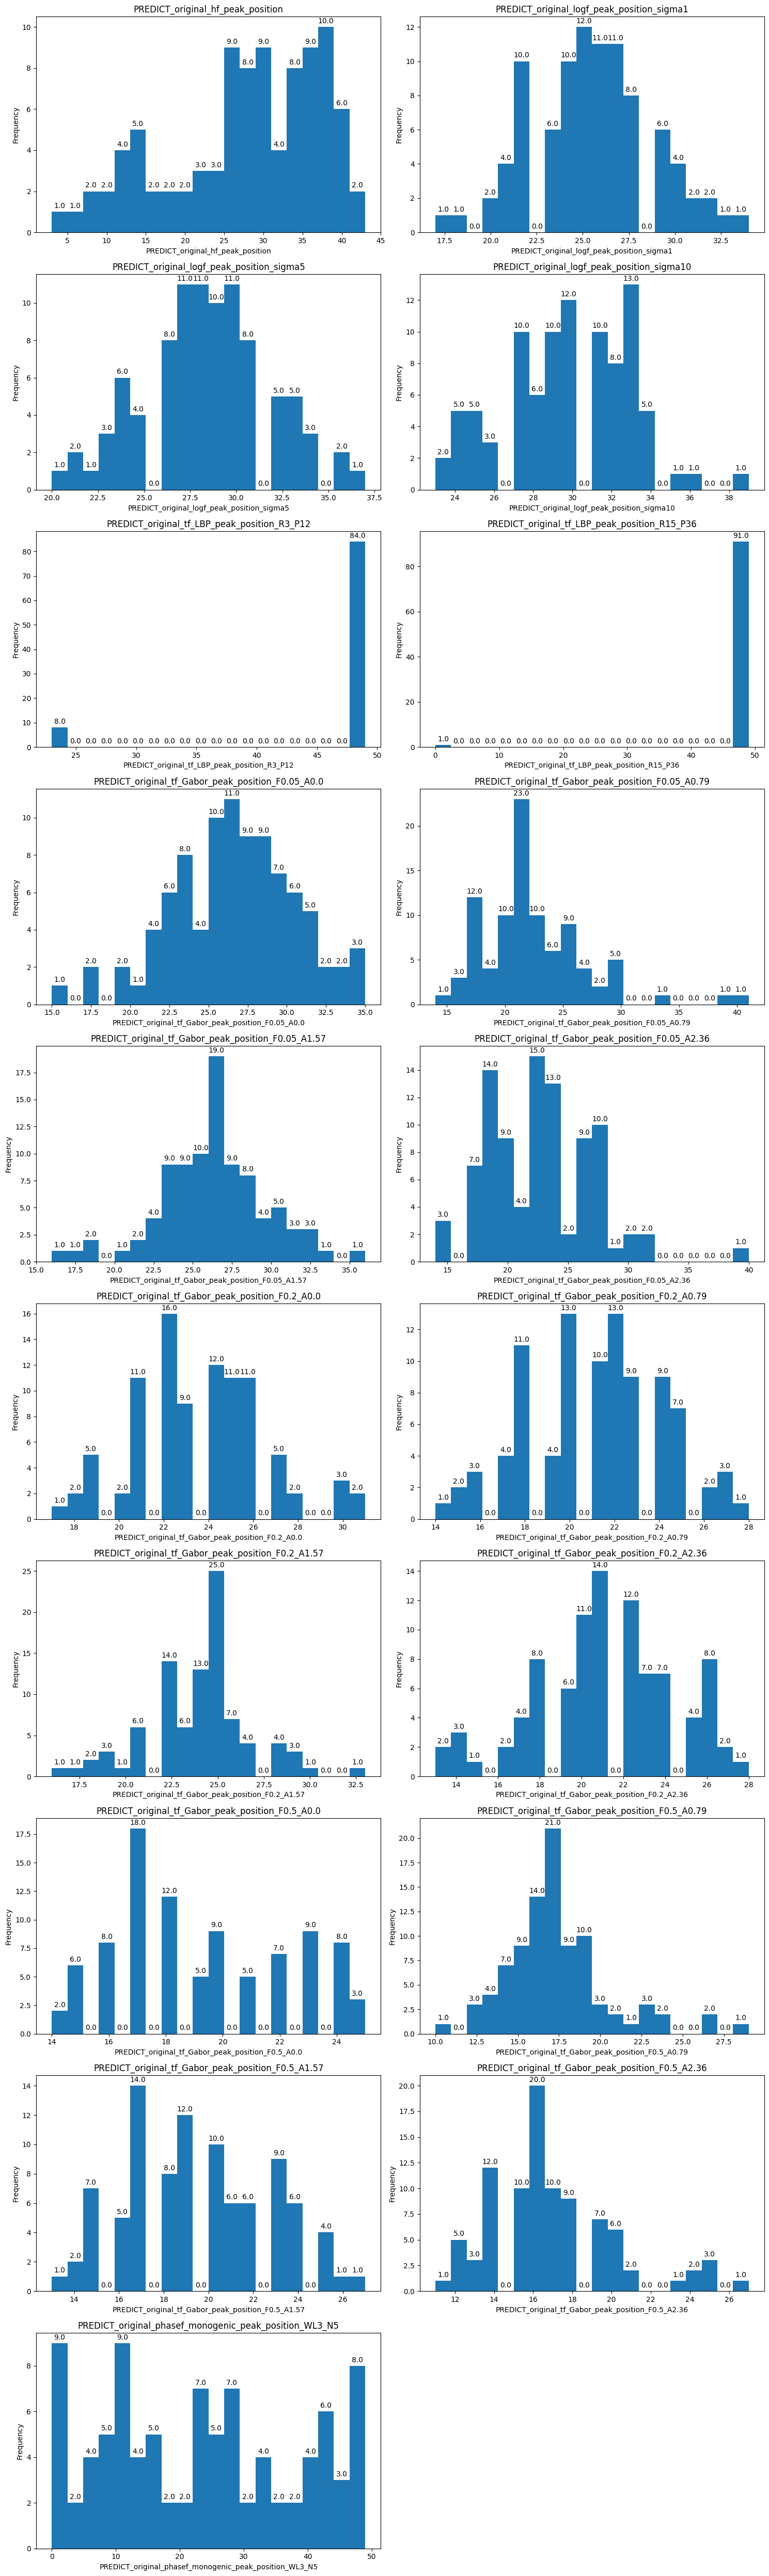

In [8]:
import matplotlib.pyplot as plt

# Assuming features_set is your set of features
num_features = len(integer_features)
num_cols = 2  # Number of columns in the subplot grid
num_rows = -(-num_features // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, feature in enumerate(integer_features):
    if feature in X_selected_train.columns:
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        X_selected_train[feature].plot(kind='hist', bins=20, ax=axes[row, col], title=feature)
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Frequency')
        # Annotate each bar with its count
        for rect in ax.patches:
            height = rect.get_height()
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom')

# Hide empty subplots if the number of features is not a multiple of num_cols
for i in range(num_features, num_rows*num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
Q1 = X_selected_train.quantile(0.25)
Q3 = X_selected_train.quantile(0.75)

# Calculate the IQR (Interquartile Range) for each column
IQR = Q3 - Q1

# Identify outliers using the IQR method
# Any value below Q1 - 1.5 * IQR
# or above Q3 + 1.5 * IQR is considered an outlier
outliers = ((X_selected_train < (Q1 - 1.5 * IQR)) |
 (X_selected_train > (Q3 + 1.5 * IQR))).sum().sum()

# Calculate the percentage of outliers
total_data_points = X_selected_train.size
total_percentage_outliers = (outliers / total_data_points) * 100

# Print the percentage of outliers for each column
print("Percentage of outliers:")
print(total_percentage_outliers)

Percentage of outliers:
4.881852551984877


In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_selected_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 columns=X_selected_train.columns,
                                 index=X_selected_train.index)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_selected_train)
X_test_scaled_df = pd.DataFrame(X_test_scaled,
                                columns=X_selected_train.columns,
                                index=X_selected_train.index)

In [11]:
X_train = X_train_scaled_df
X_test = X_test_scaled_df

In [33]:
#import pandas as pd
#from worclipo.load_data import load_data
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from statsmodels.sandbox.stats.multicomp import multipletests

#Inladen data
#feature_data = load_data()
#X_train = feature_data.iloc[:, 2:]
#y_train = feature_data['label']

# ---------------------FEATURE SELECTION -----------------------------------------------
# HYPERPARAMETER = aantal features om te selecteren

N_SVM = 14;
N_KNN = 2;
N_RF = 36;

# Encode target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# -------  ANOVA

# Compute F-statistics and p-values using f_classif
F_values, p_values = f_classif(X_train, y_train_encoded)

# Bonferroni correction on the p-values to correct for multiple testing
_, p_adjusted, _, alpha_corrected = multipletests(p_values, method='bonferroni')

# Create a DataFrame with feature names, F-values, and p-values
feature_stats_df = pd.DataFrame({'F-value': F_values, 'p-value': p_adjusted}, index=X_train.columns)

# Sort features based on absolute correlation values and select top 20
sorted_features_SVM = feature_stats_df.abs().nlargest(N_SVM, 'F-value')
sorted_features_KNN = feature_stats_df.abs().nlargest(N_KNN, 'F-value')
sorted_features_RF = feature_stats_df.abs().nlargest(N_RF, 'F-value')

# Maak nieuwe kleinere datasets met minder features
X_train_sel_SVM = X_train.loc[:, sorted_features_SVM.index]
X_train_sel_KNN = X_train.loc[:, sorted_features_KNN.index]
X_train_sel_RF = X_train.loc[:, sorted_features_RF.index]

# ---------------------CLASSIFIERS -------------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN Classifier

Accuracy for each fold: [0.47368421 0.57894737 0.72222222 0.83333333 0.77777778]
Mean accuracy: 0.6771929824561403


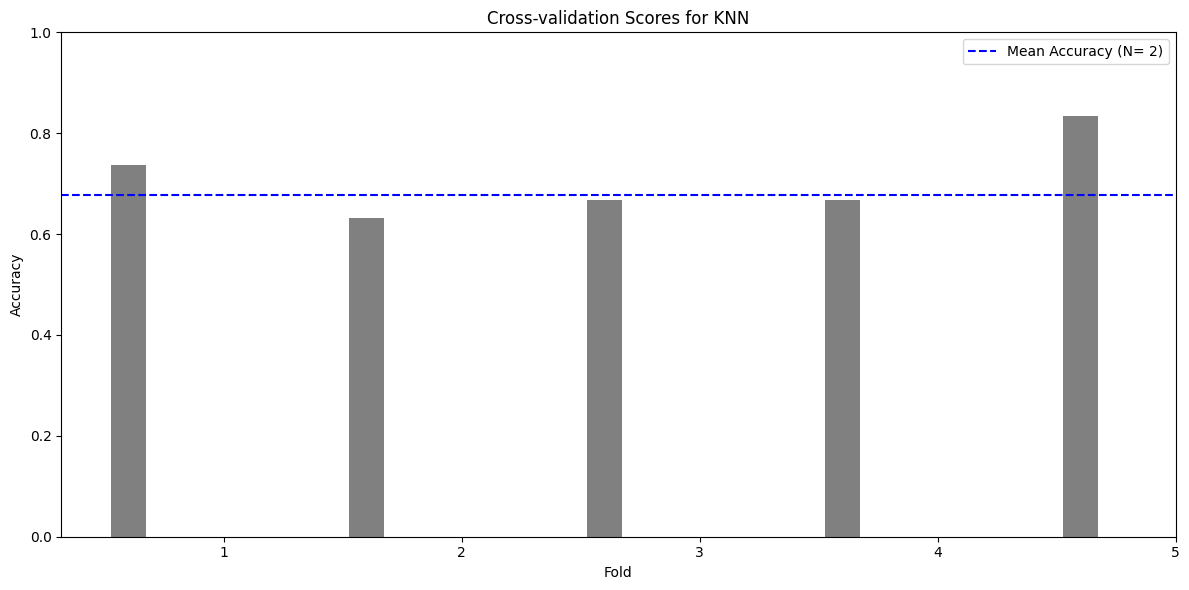

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the KNN classifier
knn = KNeighborsClassifier()

# Perform cross-validation
scores_sel_KNN = cross_val_score(knn, X_train_sel_KNN, y_train_encoded, cv=5)

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_sel_KNN)


# Print the mean accuracy across all folds
print("Mean accuracy:", scores_sel_KNN.mean())


# Plotting the scores
plt.figure(figsize=(12,6))

# Plot for selection 1
mean_accuracy_sel_KNN = scores_sel_KNN.mean()
plt.axhline(y=mean_accuracy_sel_KNN, color='blue', linestyle='--', label=f'Mean Accuracy (N= {N_KNN})')
for i, score in enumerate(scores_sel_1):
    plt.bar(i + 0.1, score, width=0.15, color='gray')


plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores for KNN')
plt.xticks(np.arange(5) + 0.5, np.arange(1, 6))  # Set x-ticks for each fold
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()



Hierboven zijn voor alle drie de training set's de accuracy bepaald. Ik heb de mean accuracy voor zowel bij cv=5 en cv=10 bepaald en dit geeft aan dat de eerste training set de beste accuracy geeft.
Verder zelf geprobeerd: een knn van 9 is het meest gunstig en voor weights distance ook beter dan uniform.

Best parameters found by Grid Search:
{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best accuracy found by Grid Search: 0.7315789473684211
Accuracy for each fold: [0.57894737 0.57894737 0.83333333 0.88888889 0.77777778]
Mean accuracy: 0.7315789473684211


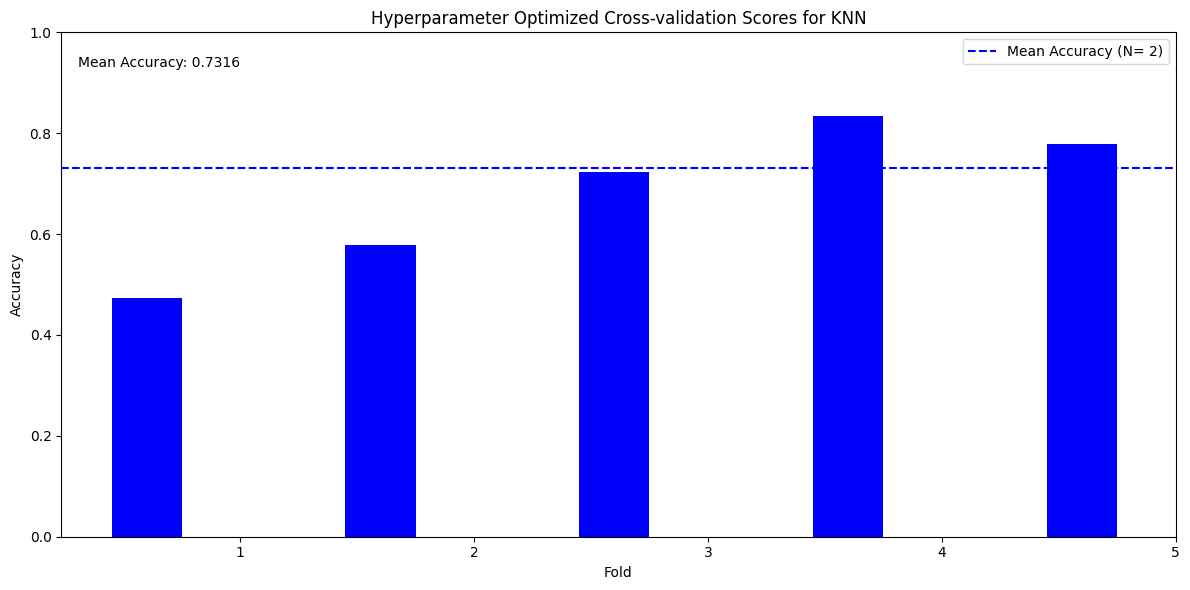

In [35]:
from sklearn.model_selection import GridSearchCV

knn_to_opt = KNeighborsClassifier()

# Perform cross-validation
#scores_to_opt = cross_val_score(knn, X_train_sel_1, y_train_encoded, cv=5)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_to_opt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_sel_KNN, y_train_encoded)

# Get the best hyperparameters and the best score
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best accuracy found by Grid Search:", grid_search.best_score_)

knn_opt = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=20, p=1, metric='minkowski', metric_params=None, n_jobs=None)

# Perform cross-validation
scores_opt_KNN = cross_val_score(knn_opt, X_train_sel_KNN, y_train_encoded, cv=5)

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_opt_KNN)

# Print the mean accuracy across all folds
print("Mean accuracy:", scores_opt_KNN.mean())

# Plotting the scores
plt.figure(figsize=(12,6))

# Plot for selection 1
mean_accuracy_opt_KNN = scores_opt_KNN.mean()
plt.axhline(y=mean_accuracy_opt_KNN, color='blue', linestyle='--', label=f'Mean Accuracy (N= {N_KNN})')
plt.text(0.5, mean_accuracy_opt_KNN + 0.20, f'Mean Accuracy: {mean_accuracy_opt_KNN:.4f}', ha='right')
for i, score in enumerate(scores_sel_KNN):
    plt.bar(i + 0.1, score, width=0.3, color='blue')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Optimized Cross-validation Scores for KNN')
plt.xticks(np.arange(5) + 0.5, np.arange(1, 6))  # Set x-ticks for each fold
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

Random Forest

Accuracy for each fold: [0.57894737 0.89473684 0.66666667 0.83333333 0.77777778]
Mean accuracy: 0.7502923976608187


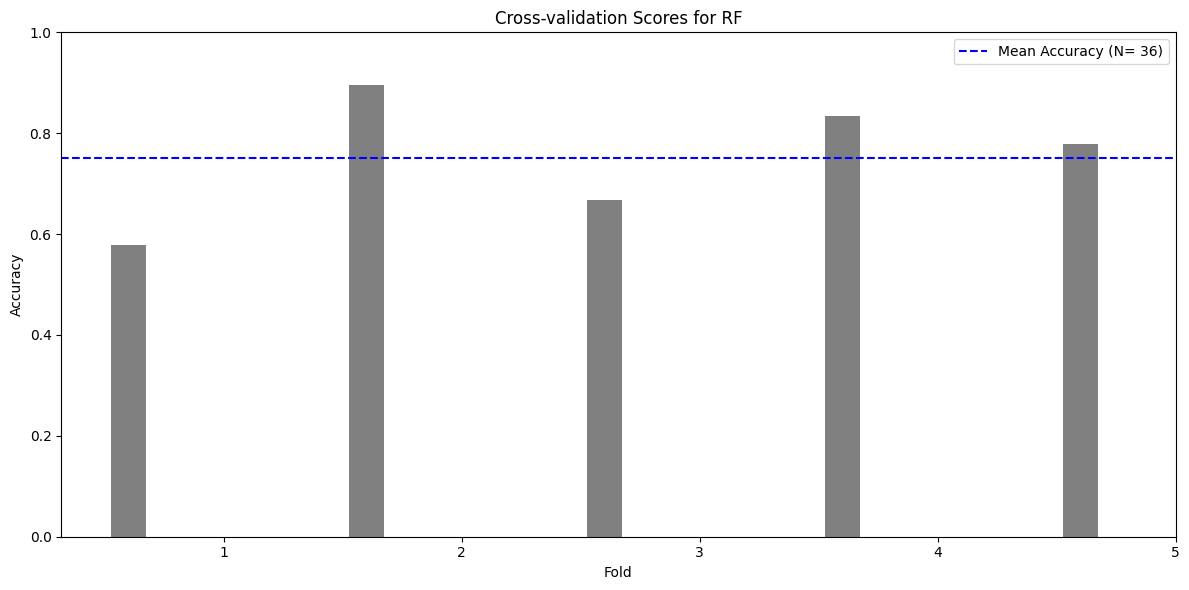

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the KNN classifier
RF = RandomForestClassifier()

# Perform cross-validation
scores_sel_RF = cross_val_score(RF, X_train_sel_RF, y_train_encoded, cv=5)

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_sel_RF)


# Print the mean accuracy across all folds
print("Mean accuracy:", scores_sel_RF.mean())


# Plotting the scores
plt.figure(figsize=(12,6))

# Plot for selection 1
mean_accuracy_sel_RF = scores_sel_RF.mean()
plt.axhline(y=mean_accuracy_sel_RF, color='blue', linestyle='--', label=f'Mean Accuracy (N= {N_RF})')
for i, score in enumerate(scores_sel_RF):
    plt.bar(i + 0.1, score, width=0.15, color='gray')


plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores for RF')
plt.xticks(np.arange(5) + 0.5, np.arange(1, 6))  # Set x-ticks for each fold
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

RF_to_opt = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(RF_to_opt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_sel_RF, y_train_encoded)

# Get the best hyperparameters and the best score
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best accuracy found by Grid Search:", grid_search.best_score_)

Best parameters found by Grid Search:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy found by Grid Search: 0.7403508771929824


Accuracy for each fold: [0.47368421 0.73684211 0.66666667 0.66666667 0.77777778]
Mean accuracy: 0.6643274853801169


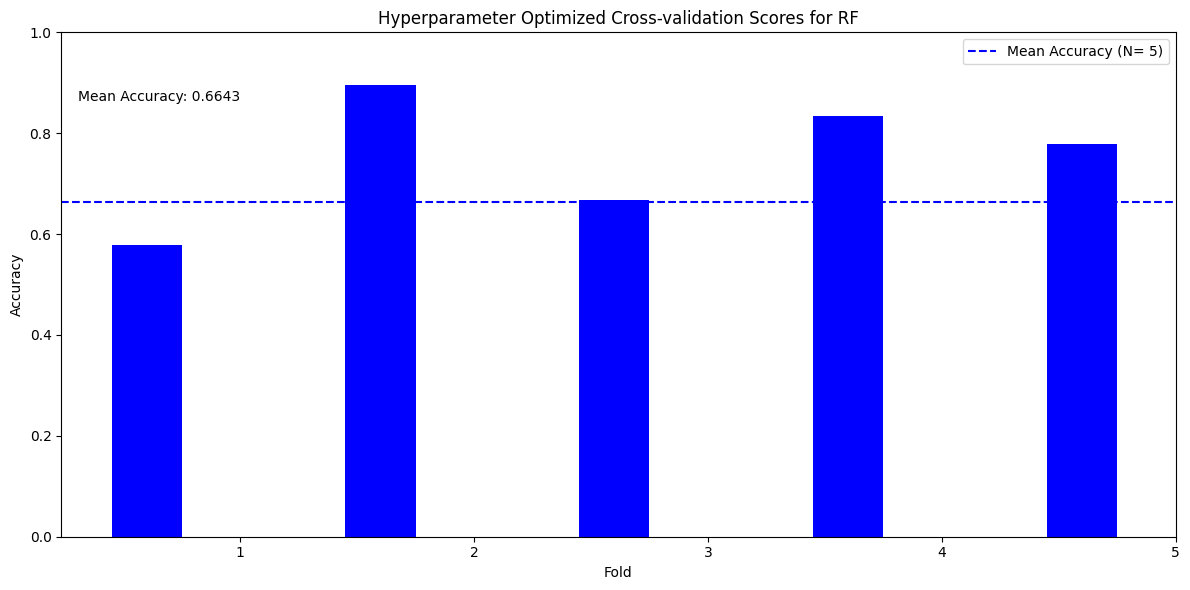

In [40]:
RF_opt = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
scores_opt_RF = cross_val_score(RF_opt, X_train_sel_RF, y_train_encoded, cv=5)
# Print the accuracy for each fold
print("Accuracy for each fold:", scores_opt_RF)

# Print the mean accuracy across all folds
print("Mean accuracy:", scores_opt_RF.mean())

# Plotting the scores
plt.figure(figsize=(12,6))

# Plot for selection 1
mean_accuracy_opt_RF = scores_opt_RF.mean()
plt.axhline(y=mean_accuracy_opt_RF, color='blue', linestyle='--', label=f'Mean Accuracy (N= {N_RF})')
plt.text(0.5, mean_accuracy_opt_RF + 0.20, f'Mean Accuracy: {mean_accuracy_opt_RF:.4f}', ha='right')
for i, score in enumerate(scores_sel_RF):
    plt.bar(i + 0.1, score, width=0.3, color='blue')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Optimized Cross-validation Scores for RF')
plt.xticks(np.arange(5) + 0.5, np.arange(1, 6))  # Set x-ticks for each fold
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

LinSVM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for each fold: [0.73684211 0.52631579 0.72222222 0.77777778 0.66666667]
Mean accuracy: 0.6859649122807017


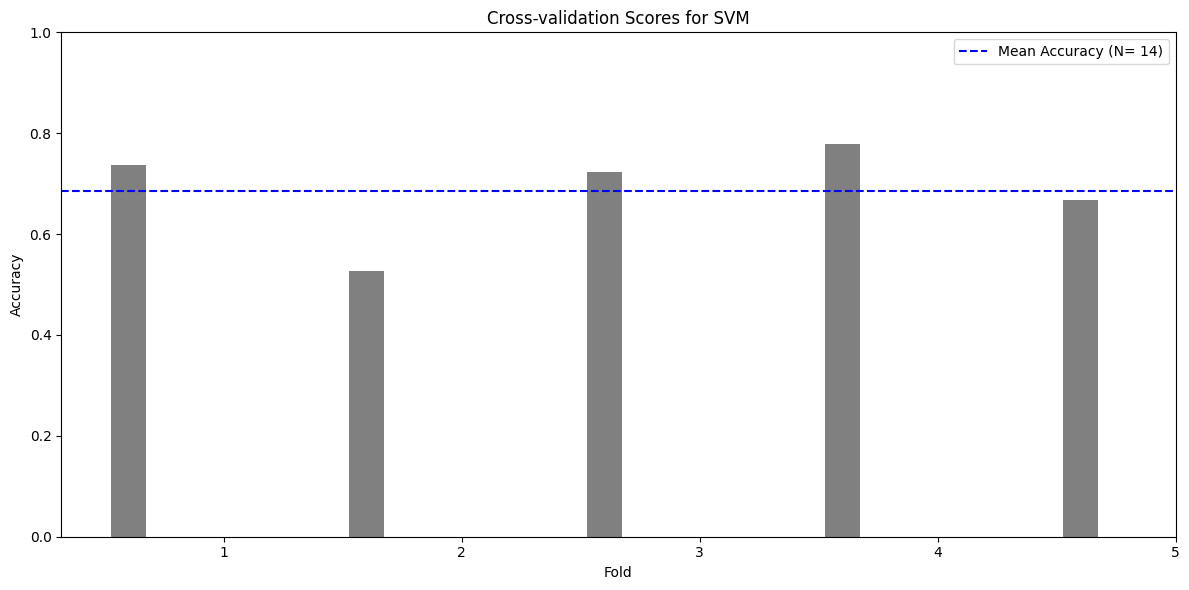

In [41]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the KNN classifier
linSVM = LinearSVC()

# Perform cross-validation
scores_sel_SVM = cross_val_score(linSVM, X_train_sel_SVM, y_train_encoded, cv=5)

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_sel_SVM)


# Print the mean accuracy across all folds
print("Mean accuracy:", scores_sel_SVM.mean())


# Plotting the scores
plt.figure(figsize=(12,6))

# Plot for selection 1
mean_accuracy_sel_SVM = scores_sel_SVM.mean()
plt.axhline(y=mean_accuracy_sel_SVM, color='blue', linestyle='--', label=f'Mean Accuracy (N= {N_SVM})')
for i, score in enumerate(scores_sel_SVM):
    plt.bar(i + 0.1, score, width=0.15, color='gray')


plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores for SVM')
plt.xticks(np.arange(5) + 0.5, np.arange(1, 6))  # Set x-ticks for each fold
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

svm_to_opt = LinearSVC()

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'loss': ['squared_hinge'],  # Loss function (only squared_hinge)
    'penalty': ['l2'],  # Penalty norm
    'dual': [False],  # Whether to solve the primal or dual optimization problem
    'max_iter': [1000]  # Maximum number of iterations
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_to_opt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_sel_SVM, y_train_encoded)

# Get the best hyperparameters and the best score
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best accuracy found by Grid Search:", grid_search.best_score_)

Best parameters found by Grid Search:
{'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}
Best accuracy found by Grid Search: 0.7076023391812866


Accuracy for each fold: [0.68421053 0.63157895 0.72222222 0.83333333 0.66666667]
Mean accuracy: 0.7076023391812866


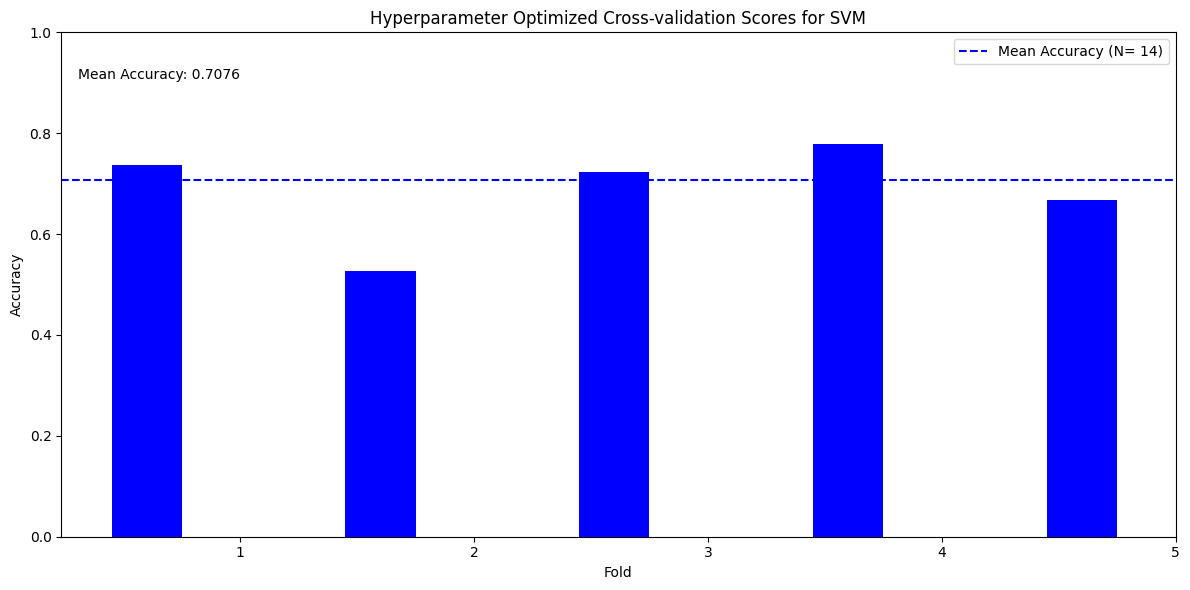

In [43]:
SVM_opt = LinearSVC(C=0.1, dual=False, loss='squared_hinge', max_iter=1000, penalty='l2')
scores_opt_SVM= cross_val_score(SVM_opt, X_train_sel_SVM, y_train_encoded, cv=5)
# Print the accuracy for each fold
print("Accuracy for each fold:", scores_opt_SVM)

# Print the mean accuracy across all folds
print("Mean accuracy:", scores_opt_SVM.mean())

# Plotting the scores
plt.figure(figsize=(12,6))

# Plot for selection 1
mean_accuracy_opt_SVM = scores_opt_SVM.mean()
plt.axhline(y=mean_accuracy_opt_SVM, color='blue', linestyle='--', label=f'Mean Accuracy (N= {N_SVM})')
plt.text(0.5, mean_accuracy_opt_SVM + 0.20, f'Mean Accuracy: {mean_accuracy_opt_SVM:.4f}', ha='right')
for i, score in enumerate(scores_sel_SVM):
    plt.bar(i + 0.1, score, width=0.3, color='blue')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Optimized Cross-validation Scores for SVM')
plt.xticks(np.arange(5) + 0.5, np.arange(1, 6))  # Set x-ticks for each fold
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()